In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten

In [18]:
tf.keras.datasets.fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [19]:
(x_train , y_train),(x_test , y_test)=tf.keras.datasets.fashion_mnist.load_data()

y_train : [9 0 0 ... 3 0 5]


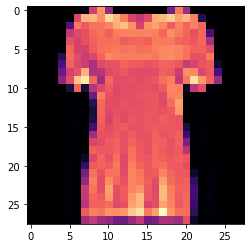

In [20]:
print("y_train :",y_train)
import matplotlib.pyplot as plt
plt.imshow(x_train[10],cmap='magma')

plt.show()

In [21]:
model = tf.keras.models.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512 , activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')

])

In [22]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
import os , datetime

log =os.path.join('logs',datetime.datetime.now().strftime('%y%m%d-%H%M%S'))
tc = tf.keras.callbacks.TensorBoard(log,histogram_freq=1)

In [24]:
cp = 'Model_checkpoint/CP-{epoch:04d}.ckpt'
cpd=os.path.dirname(cp)
cpc = tf.keras.callbacks.ModelCheckpoint(
    cp,monitor='val_acc' , verbose=1,save_weight_only=True,
    save_freq='epoch'
)

In [25]:
history =model.fit(x_train , y_train,epochs=5,validation_data=(x_test , y_test), callbacks=[tc,cpc])
loss,acc =model.evaluate(x_test , y_test , verbose=1)
print('orginal model , accuracy:{:5.2f}%'.format(100*acc))

Epoch 1/5
1869/1875 [============================>.] - ETA: 0s - loss: 3.2326 - accuracy: 0.7179
Epoch 1: saving model to Model_checkpoint\CP-0001.ckpt


INFO:tensorflow:Assets written to: Model_checkpoint\CP-0001.ckpt\assets


INFO:tensorflow:Assets written to: Model_checkpoint\CP-0001.ckpt\assets


1875/1875 [==============================] - 8s 4ms/step - loss: 3.2246 - accuracy: 0.7180 - val_loss: 0.6076 - val_accuracy: 0.7895
Epoch 2/5
1875/1875 [==============================] - ETA: 0s - loss: 0.7097 - accuracy: 0.7556
Epoch 2: saving model to Model_checkpoint\CP-0002.ckpt


INFO:tensorflow:Assets written to: Model_checkpoint\CP-0002.ckpt\assets


INFO:tensorflow:Assets written to: Model_checkpoint\CP-0002.ckpt\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.7097 - accuracy: 0.7556 - val_loss: 0.5774 - val_accuracy: 0.7969
Epoch 3/5
1875/1875 [==============================] - ETA: 0s - loss: 0.6940 - accuracy: 0.7601
Epoch 3: saving model to Model_checkpoint\CP-0003.ckpt


INFO:tensorflow:Assets written to: Model_checkpoint\CP-0003.ckpt\assets


INFO:tensorflow:Assets written to: Model_checkpoint\CP-0003.ckpt\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.6940 - accuracy: 0.7601 - val_loss: 0.8178 - val_accuracy: 0.7478
Epoch 4/5
1868/1875 [============================>.] - ETA: 0s - loss: 0.6961 - accuracy: 0.7648
Epoch 4: saving model to Model_checkpoint\CP-0004.ckpt


INFO:tensorflow:Assets written to: Model_checkpoint\CP-0004.ckpt\assets


INFO:tensorflow:Assets written to: Model_checkpoint\CP-0004.ckpt\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.6962 - accuracy: 0.7648 - val_loss: 0.6212 - val_accuracy: 0.8039
Epoch 5/5
1864/1875 [============================>.] - ETA: 0s - loss: 0.6773 - accuracy: 0.7679
Epoch 5: saving model to Model_checkpoint\CP-0005.ckpt


INFO:tensorflow:Assets written to: Model_checkpoint\CP-0005.ckpt\assets


INFO:tensorflow:Assets written to: Model_checkpoint\CP-0005.ckpt\assets


313/313 [==============================] - 0s 857us/step - loss: 0.5863 - accuracy: 0.8242
orginal model , accuracy:82.42%


In [26]:
model.save('Mymod',save_format='tf')

INFO:tensorflow:Assets written to: Mymod\assets


INFO:tensorflow:Assets written to: Mymod\assets


In [27]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [28]:
%tensorboard --logdir log

Reusing TensorBoard on port 6006 (pid 5760), started 0:06:30 ago. (Use '!kill 5760' to kill it.)